# Part c and d 

In [2]:
from functions import *
mplstyle.use(['ggplot', 'fast'])
plt.rcParams.update({
    "text.usetex": True,       
    "font.family": "serif",    
    "font.size": 10, 
})

seed = np.random.seed(2018)

# Hyperparameters from part a and b:
polynomial_degree     = 14
number_of_data_points = 1500
lambda_               = 1e-3
# Hyperparameters from part c, d e and f:
learning_rate = 0.005
n_iterations  = 1000000
tolerance     = 1e-12
use_tol       = True
beta          = 0.9
beta1         = 0.9
beta2         = 0.999
epsilon       = 1e-8
lambda_       = 0.01
batch_size    = 32

out_dir = Path("../Figures")      # fra Code/ til Figures/
out_dir.mkdir(parents=True, exist_ok=True)

### Using shared functions to create dataset

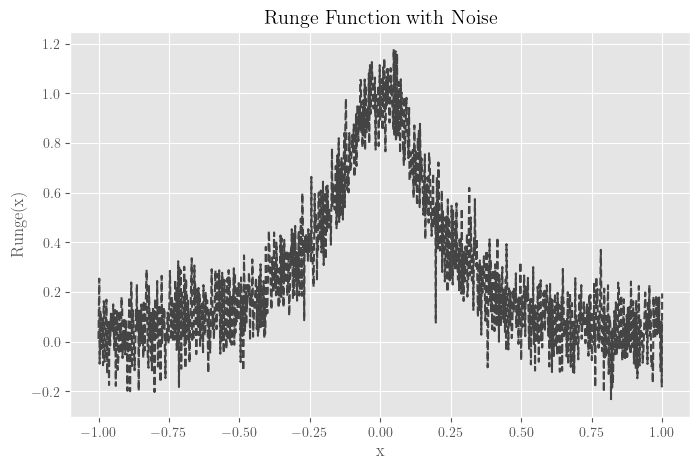

In [3]:
train, test, full = make_data(number_of_data_points, seed)
x, y = full[0], full[1]

plt.figure(figsize=(8, 5))
plt.plot(x, y, color='black', linestyle='--', alpha=0.7)
plt.title('Runge Function with Noise')
plt.xlabel('x')
plt.ylabel('Runge(x)')
plt.show()

In [4]:
# We start by splitting the data into training and test sets
x_train, x_test, y_train, y_test = train[0], test[0], train[1], test[1]
x_train = x_train.reshape(-1, 1)
x_test  = x_test.reshape(-1, 1)
x = x.reshape(-1, 1)

In [5]:
# Making a design matrix based of the scaled data
X_train = polynomial_features(x_train, polynomial_degree, intercept=True)
X_test  = polynomial_features(x_test, polynomial_degree, intercept=True)

In [5]:
# # Create subplots
# fig, axs = plt.subplots(1, 2, figsize=(10, 3))
# # First subplot for the original training and test data
# axs[0].scatter(x_train, y_train, color='red', s=2, label='Training data')
# axs[0].scatter(x_test, y_test, color='blue', s=2, label='Test data')
# axs[0].set_xlabel('X')
# axs[0].set_ylabel('y')
# axs[0].set_title('Training and Test Data - Original')
# axs[0].legend()
# # Second subplot for the scaled training and test data
# axs[1].scatter(x_train_s, y_train, color='red', s=2, label='Training data')
# axs[1].scatter(x_test_s, y_test, color='blue', s=2, label='Test data')
# axs[1].set_xlabel('X')
# axs[1].set_ylabel('y')
# axs[1].set_title('Training and Test Data - Scaled')
# axs[1].legend()
# # Show the plots
# plt.tight_layout()
# plt.show()

**Scaling makes the x-values not between -1 and 1! I get wierd results from this. Don't understand!**

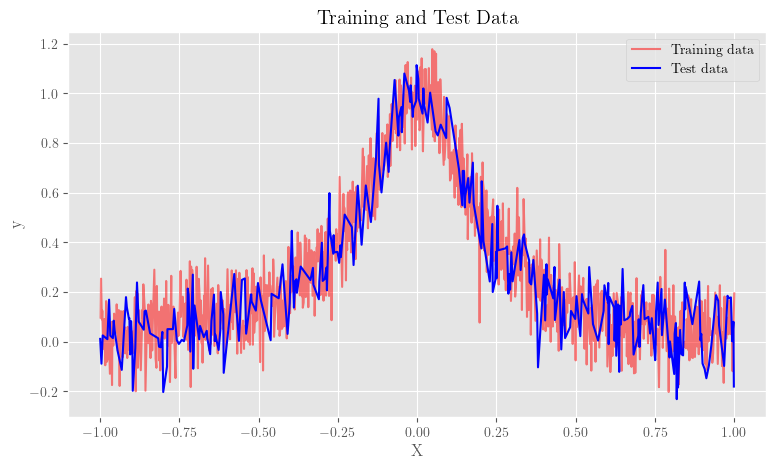

In [6]:
# Plot training data and test data, as lines, but then need to sort x first
# Sort the training data for plotting
sorted_indices_train = np.argsort(x_train.flatten())
x_train_sorted = x_train[sorted_indices_train]
y_train_sorted = y_train[sorted_indices_train]  
# Sort the test data for plotting
sorted_indices_test = np.argsort(x_test.flatten())
x_test_sorted = x_test[sorted_indices_test]
y_test_sorted = y_test[sorted_indices_test]
# Plot
plt.figure(figsize=(9, 5))
plt.plot(x_train_sorted, y_train_sorted, color='red', label='Training data', alpha=0.5)
plt.plot(x_test_sorted,  y_test_sorted,  color='blue',  label='Test data')
plt.xlabel('X')
plt.ylabel('y')
plt.title('Training and Test Data')
plt.legend()
plt.show()

## Part c: Writing your own gradient decent code 

Replace now the analytical expressions for the optimal parameters $\theta$ with your own gradient descent code. In this exercise we focus only on the simplest gradient descent approach with a fixed learning rate (excercises from week 37 and lecture notes from week 36).

Study and compare your results from parts a) and b) with your gradient descent approach. Discuss in particular the role of the learning rate.

In [7]:
n_iterations = 100000

# OLS regression : 
# OLS analytical solution
theta_ols  = OLS_parameters(X_train, y_train)
y_pred_ols = X_test @ theta_ols
mse_ols    = MSE(y_test, y_pred_ols)
r2_ols     = R2(y_test, y_pred_ols)
# Gradient descent solution
learning_rate = [0.001, 0.01, 0.1, 0.2, 0.3]
cost_histories_ols = []
pred_ols = []
mses_ols = []
r2s_ols  = []
print(f"OLS Analytical Solution : MSE = {mse_ols:.6f}, R2 = {r2_ols:.6f}")
print()
for i in learning_rate:
    print(f"Learning rate: {i}")
    theta_gd_ols, cost_history_ols = gradient_descent_ols(X_train, y_train, i, n_iterations, tolerance, use_tol)
    y_pred_gd_ols = X_test @ theta_gd_ols
    mse_gd_ols    = MSE(y_test, y_pred_gd_ols)
    r2_gd_ols     = R2(y_test, y_pred_gd_ols)
    cost_histories_ols.append(cost_history_ols)
    pred_ols.append(y_pred_gd_ols)
    mses_ols.append(mse_gd_ols)
    r2s_ols.append(r2_gd_ols)
    # Print results
    print(f"OLS Gradient Descent    : MSE = {mse_gd_ols:.6f}, R2 = {r2_gd_ols:.6f}")
    print()



OLS Analytical Solution : MSE = 0.000038, R2 = 0.875382

Learning rate: 0.001
OLS did not converge.
OLS Gradient Descent    : MSE = 0.000111, R2 = 0.631736

Learning rate: 0.01
OLS did not converge.
OLS Gradient Descent    : MSE = 0.000081, R2 = 0.730305

Learning rate: 0.1
OLS did not converge.
OLS Gradient Descent    : MSE = 0.000063, R2 = 0.792915

Learning rate: 0.2
OLS did not converge.
OLS Gradient Descent    : MSE = 0.000061, R2 = 0.799109

Learning rate: 0.3
OLS did not converge.
OLS Gradient Descent    : MSE = 0.000060, R2 = 0.800497



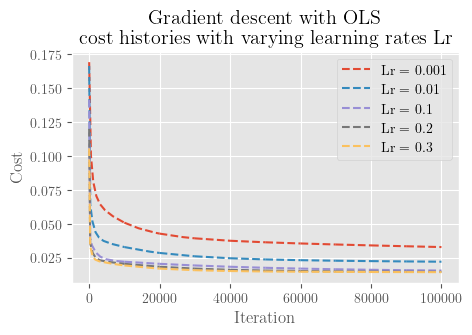

In [8]:
plt.figure(figsize=(5, 3))
plt.plot(cost_histories_ols[0], label='Lr = 0.001',  linestyle='--')
plt.plot(cost_histories_ols[1], label='Lr = 0.01',  linestyle='--')
plt.plot(cost_histories_ols[2], label='Lr = 0.1',  linestyle='--')
plt.plot(cost_histories_ols[3], label='Lr = 0.2',  linestyle='--')
plt.plot(cost_histories_ols[4], label='Lr = 0.3',  linestyle='--')

plt.title("Gradient descent with OLS\ncost histories with varying learning rates Lr")
plt.xlabel("Iteration")
plt.ylabel("Cost")
plt.legend()
plt.savefig(out_dir / "GD_OLS_cost_dlr.pdf" , dpi=200, bbox_inches="tight")
plt.show()

In [9]:

# RIDGE regression : 
# Analytical solution
beta_ridge   = Ridge_parameters(X_train, y_train, lambda_)
y_pred_ridge = X_test @ beta_ridge
mse_ridge    = MSE(y_test, y_pred_ridge)
r2_ridge     = R2(y_test, y_pred_ridge)
# Gradient descent solution
cost_histories_ridge = []
pred_ridge = []
mses_ridge = []
r2s_ridge  = []
print(f"Ridge Analytical Solution: MSE = {mse_ridge:.6f}, R2 = {r2_ridge:.6f}")
for i in learning_rate:
    print(f"Learning rate: {i}")
    beta_gd_ridge, cost_history_ridge = gradient_descent_ridge(X_train, y_train, lambda_, i, n_iterations, tolerance, use_tol)
    y_pred_gd_ridge = X_test @ beta_gd_ridge
    mse_gd_ridge    = MSE(y_test, y_pred_gd_ridge)
    r2_gd_ridge     = R2(y_test, y_pred_gd_ridge)
    pred_ridge.append(y_pred_gd_ridge)
    cost_histories_ridge.append(cost_history_ridge)
    mses_ridge.append(mse_gd_ridge)
    r2s_ridge.append(r2_gd_ridge)
    # Print results
    print(f"Ridge Gradient Descent:    MSE = {mse_gd_ridge:.6f}, R2 = {r2_gd_ridge:.6f}")

Ridge Analytical Solution: MSE = 0.000058, R2 = 0.807407
Learning rate: 0.001
Ridge did not converge.
Ridge Gradient Descent:    MSE = 0.000130, R2 = 0.570086
Learning rate: 0.01
Ridge converged after 30279 iterations.
Ridge did not converge.
Ridge Gradient Descent:    MSE = 0.000129, R2 = 0.574223
Learning rate: 0.1
Ridge converged after 3533 iterations.
Ridge did not converge.
Ridge Gradient Descent:    MSE = 0.000129, R2 = 0.574250
Learning rate: 0.2
Ridge converged after 1841 iterations.
Ridge did not converge.
Ridge Gradient Descent:    MSE = 0.000129, R2 = 0.574254
Learning rate: 0.3
Ridge converged after 1256 iterations.
Ridge did not converge.
Ridge Gradient Descent:    MSE = 0.000129, R2 = 0.574255


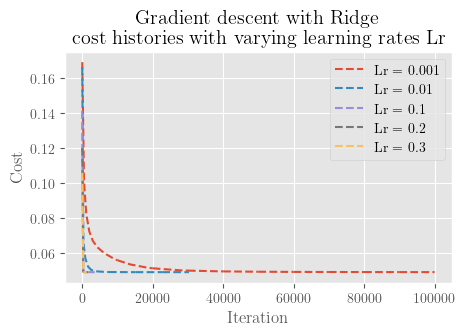

In [10]:
plt.figure(figsize=(5, 3))
plt.plot(cost_histories_ridge[0], label='Lr = 0.001',  linestyle='--')
plt.plot(cost_histories_ridge[1], label='Lr = 0.01',  linestyle='--')
plt.plot(cost_histories_ridge[2], label='Lr = 0.1',  linestyle='--')
plt.plot(cost_histories_ridge[3], label='Lr = 0.2',  linestyle='--')
plt.plot(cost_histories_ridge[4], label='Lr = 0.3',  linestyle='--')
plt.title("Gradient descent with Ridge\ncost histories with varying learning rates Lr")
plt.xlabel("Iteration")
plt.ylabel("Cost")
plt.legend()
#plt.savefig(out_dir / "GD_ridge_cost_dlr.pdf" , dpi=200, bbox_inches="tight")
plt.show()

In [11]:
learning_rate = 0.01
n_iterations  = 10000000
#OLS
theta_gd_ols, cost_history_ols = gradient_descent_ols(X_train, y_train, learning_rate, n_iterations, tolerance, use_tol)
y_pred_gd_ols = X_test @ theta_gd_ols
mse_gd_ols    = MSE(y_test, y_pred_gd_ols)
r2_gd_ols     = R2(y_test, y_pred_gd_ols)

print(f"OLS Analytical Solution : MSE = {mse_ols:.6f}, R2 = {r2_ols:.6f}")
print(f"OLS Gradient Descent    : MSE = {mse_gd_ols:.6f}, R2 = {r2_gd_ols:.6f}")

#OLS
theta_gd_ols, cost_history_ols = gradient_descent_ols(X_train, y_train, learning_rate, n_iterations, tolerance, use_tol)
y_pred_gd_ols = X_test @ theta_gd_ols
mse_gd_ols    = MSE(y_test, y_pred_gd_ols)
r2_gd_ols     = R2(y_test, y_pred_gd_ols)

print(f"OLS Analytical Solution : MSE = {mse_ols:.6f}, R2 = {r2_ols:.6f}")
print(f"OLS Gradient Descent    : MSE = {mse_gd_ols:.6f}, R2 = {r2_gd_ols:.6f}")

KeyboardInterrupt: 

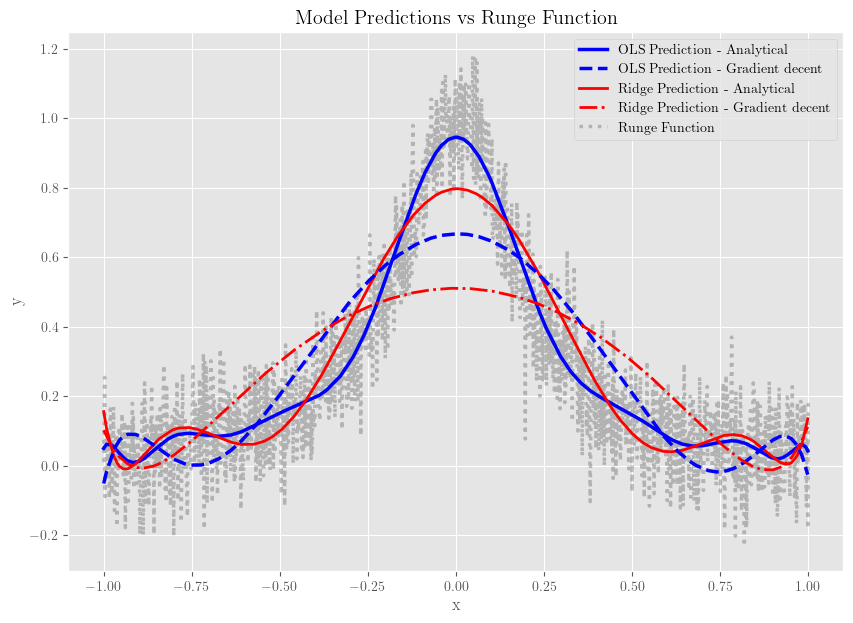

In [9]:
# Plot the results from OLS and Ridge on the test data
plt.figure(figsize=(10, 7))
# Sort x_test and corresponding predictions for better plotting
sort_indices = np.argsort(x_test.flatten())
plt.plot(x_test[sort_indices], y_pred_ols[sort_indices],      color='blue', label='OLS Prediction - Analytical',       zorder=5, linewidth=2.5)
plt.plot(x_test[sort_indices], y_pred_gd_ols[sort_indices],   color='blue', label='OLS Prediction - Gradient decent',  zorder=8, linewidth=2.5, linestyle='--')
plt.plot(x_test[sort_indices], y_pred_ridge[sort_indices],    color='red', label='Ridge Prediction - Analytical',      zorder=5, linewidth=2)
plt.plot(x_test[sort_indices], y_pred_gd_ridge[sort_indices], color='red', label='Ridge Prediction - Gradient decent', zorder=8, linewidth=2, linestyle='-.')
# Also plot the true function, however we need to sort x for this
sort_indices_full = np.argsort(x.flatten())
plt.plot(x[sort_indices_full], y[sort_indices_full], color='gray', linestyle=':', label='Runge Function', linewidth=2.5, alpha=0.5)
plt.xlabel("x")
plt.ylabel("y")
plt.title("Model Predictions vs Runge Function")
plt.legend()
plt.show()

## Part d: Including momentum and more advanced ways to update the learning the rate

We keep our focus on OLS and Ridge regression and update our code for
the gradient descent method by including **momentum**, **ADAgrad**,
**RMSprop** and **ADAM** as methods fro iteratively updating your learning
rate. Discuss the results and compare the different methods applied to
the one-dimensional Runge function. The lecture notes from week 37 contain several examples on how to implement these methods.

In [6]:
methods = ['gd', 'momentum', 'adagrad', 'rmsprop', 'adam']

In [7]:
results = {}
learning_rate = 0.001
n_iterations  = 10000
for method in methods:
    theta_OLS, cost_history_OLS     = gradient_descent_advanced(X_train, y_train, method=method, lr_method='ols',   learning_rate=learning_rate, n_iterations=n_iterations, tol=tolerance, use_tol=use_tol, beta=beta, beta1=beta1, beta2=beta2, epsilon=epsilon, lambda_=lambda_)
    theta_Ridge, cost_history_Ridge = gradient_descent_advanced(X_train, y_train, method=method, lr_method='ridge', learning_rate=learning_rate, n_iterations=n_iterations, tol=tolerance, use_tol=use_tol, beta=beta, beta1=beta1, beta2=beta2, epsilon=epsilon, lambda_=lambda_)
    theta_Lasso, cost_history_Lasso = gradient_descent_advanced(X_train, y_train, method=method, lr_method='lasso', learning_rate=learning_rate, n_iterations=n_iterations, tol=tolerance, use_tol=use_tol, beta=beta, beta1=beta1, beta2=beta2, epsilon=epsilon, lambda_=lambda_)
    y_pred_OLS   = X_test @ theta_OLS
    y_pred_Ridge = X_test @ theta_Ridge
    y_pred_Lasso = X_test @ theta_Lasso
    mse_OLS   = MSE(y_test, y_pred_OLS)
    r2_OLS    = R2(y_test, y_pred_OLS)
    mse_Ridge = MSE(y_test, y_pred_Ridge)
    r2_Ridge  = R2(y_test, y_pred_Ridge)
    mse_Lasso = MSE(y_test, y_pred_Lasso)
    r2_Lasso  = R2(y_test, y_pred_Lasso)
    results[method] = {
        'theta_OLS'         : theta_OLS,
        'cost_history_OLS'  : cost_history_OLS,
        'mse_OLS'           : mse_OLS,
        'r2_OLS'            : r2_OLS,
        'theta_Ridge'       : theta_Ridge,
        'cost_history_Ridge': cost_history_Ridge,
        'mse_Ridge'         : mse_Ridge,
        'r2_Ridge'          : r2_Ridge,
        'theta_Lasso'       : theta_Lasso,
        'cost_history_Lasso': cost_history_Lasso,
        'mse_Lasso'         : mse_Lasso,
        'r2_Lasso'          : r2_Lasso
    }
    print(f"OLS   : {method}: MSE = {mse_OLS:.6f}, R2 = {r2_OLS:.6f}")
    print(f"Ridge : {method}: MSE = {mse_Ridge:.6f}, R2 = {r2_Ridge:.6f}")
    print(f"Lasso : {method}: MSE = {mse_Lasso:.6f}, R2 = {r2_Lasso:.6f}")
    print()

ols: gd converged after 1 iterations.
ridge: gd converged after 1 iterations.
lasso: gd converged after 1 iterations.
OLS   : gd: MSE = 0.000524, R2 = -0.734656
Ridge : gd: MSE = 0.000524, R2 = -0.734656
Lasso : gd: MSE = 0.000524, R2 = -0.734656

OLS   : momentum: MSE = 0.000111, R2 = 0.631694
Ridge : momentum: MSE = 0.000130, R2 = 0.570102
Lasso : momentum: MSE = 0.000133, R2 = 0.558547

OLS   : adagrad: MSE = 0.000305, R2 = -0.009539
Ridge : adagrad: MSE = 0.000306, R2 = -0.011869
Lasso : adagrad: MSE = 0.000308, R2 = -0.020020

ridge: rmsprop converged after 1291 iterations.
OLS   : rmsprop: MSE = 0.000064, R2 = 0.787718
Ridge : rmsprop: MSE = 0.000129, R2 = 0.574456
Lasso : rmsprop: MSE = 0.000128, R2 = 0.575904

ridge: adam converged after 2596 iterations.
OLS   : adam: MSE = 0.000064, R2 = 0.788637
Ridge : adam: MSE = 0.000129, R2 = 0.574249
Lasso : adam: MSE = 0.000128, R2 = 0.575706



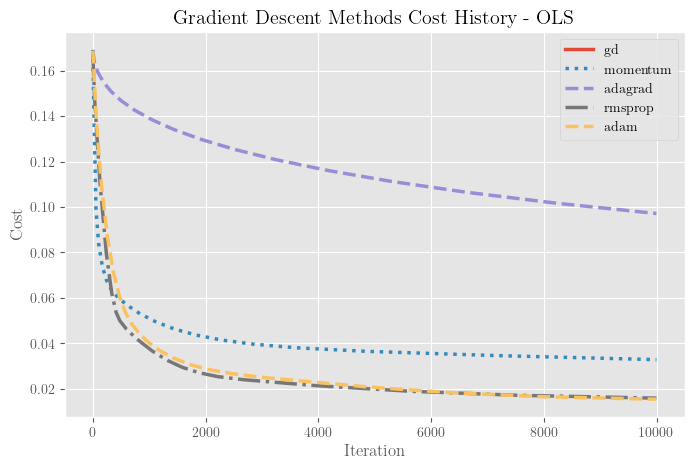

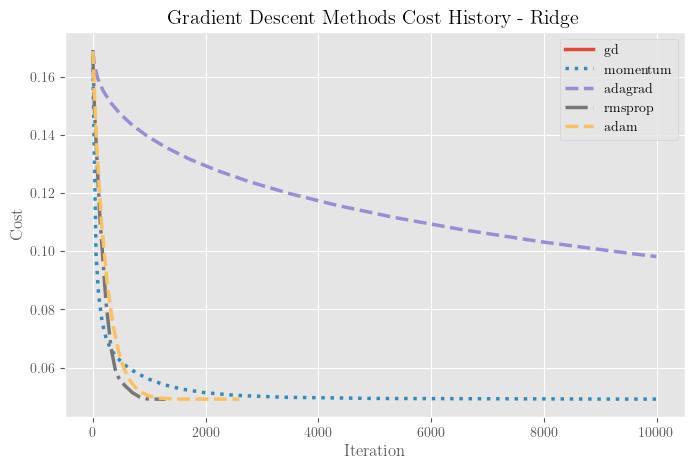

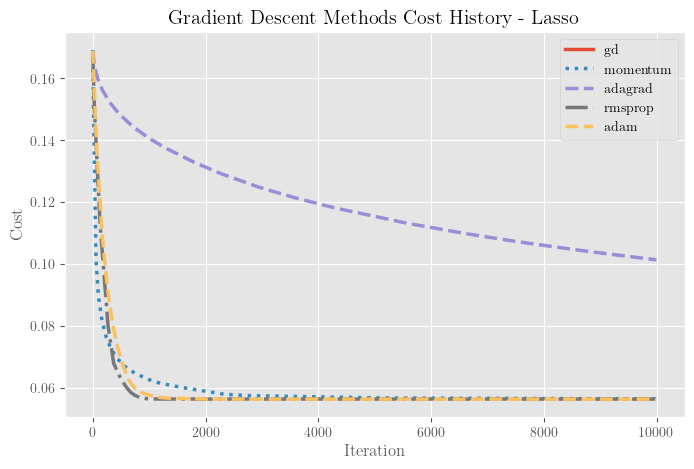

In [8]:
colors_cost_history    = {'gd': '#21BCFF', 'momentum': '#FF10F0', 'adagrad': '#F5B027', 'rmsprop': '#800080', 'adam': '#F5276C'}
linestyle_cost_history = {'gd': '-', 'momentum': ':', 'adagrad': '--', 'rmsprop': '-.', 'adam': '--'}
# Plot cost history for all methods
plt.figure(figsize=(8, 5))
for method in methods:
    plt.plot(results[method]['cost_history_OLS'], label=method, linewidth=2.5, linestyle=linestyle_cost_history[method], alpha=1)
plt.title("Gradient Descent Methods Cost History - OLS")
plt.xlabel("Iteration")
plt.ylabel("Cost")
plt.legend()
plt.show()
plt.figure(figsize=(8, 5))
for method in methods:
    plt.plot(results[method]['cost_history_Ridge'], label=method, linewidth=2.5, linestyle=linestyle_cost_history[method], alpha=1)
plt.title("Gradient Descent Methods Cost History - Ridge")
plt.xlabel("Iteration")
plt.ylabel("Cost")
plt.legend()
plt.show()
plt.figure(figsize=(8, 5))
for method in methods:
    plt.plot(results[method]['cost_history_Lasso'], label=method, linewidth=2.5, linestyle=linestyle_cost_history[method], alpha=1)
plt.title("Gradient Descent Methods Cost History - Lasso")
plt.xlabel("Iteration")
plt.ylabel("Cost")
plt.legend()
plt.show()

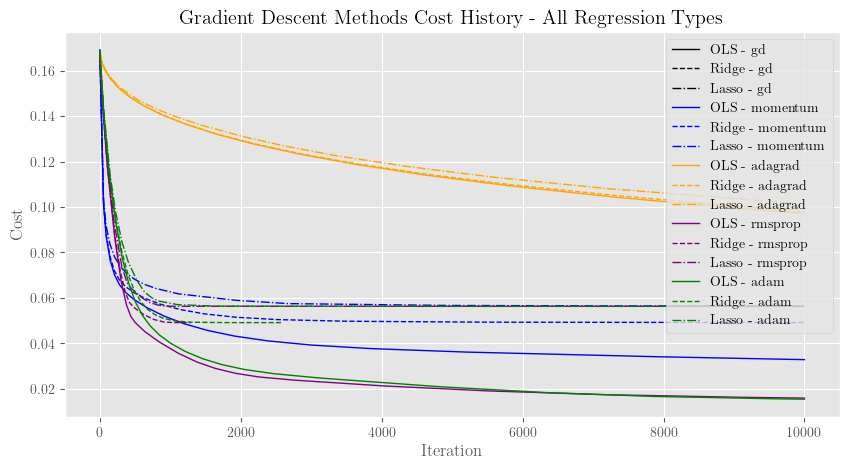

In [9]:
# Same plots for all regression types in one figure, with one linestyles per regression type, and different colors for the different  methods
plt.figure(figsize=(10, 5))
colors_OLS   = {'gd': 'black', 'momentum': 'blue', 'adagrad': 'orange', 'rmsprop': 'purple', 'adam': 'green'}
colors_Ridge = {'gd': '#A01B03', 'momentum': '#CD2204', 'adagrad': '#ED2905', 'rmsprop': '#FB5032', 'adam': '#FC775F'}
colors_Lasso = {'gd': '#A01B03', 'momentum': '#CD2204', 'adagrad': '#ED2905', 'rmsprop': '#FB5032', 'adam': '#FC775F'}
for method in methods:
    plt.plot(results[method]['cost_history_OLS'],   label=f'OLS - {method}',   linewidth=1, linestyle='-', color=colors_OLS[method])
    plt.plot(results[method]['cost_history_Ridge'], label=f'Ridge - {method}', linewidth=1, linestyle='--', color=colors_OLS[method])
    plt.plot(results[method]['cost_history_Lasso'], label=f'Lasso - {method}', linewidth=1, linestyle='dashdot', color=colors_OLS[method])
plt.title("Gradient Descent Methods Cost History - All Regression Types")
plt.xlabel("Iteration")
plt.ylabel("Cost")  
# Making the legend outside the plot
plt.legend(loc='upper right')
plt.show()

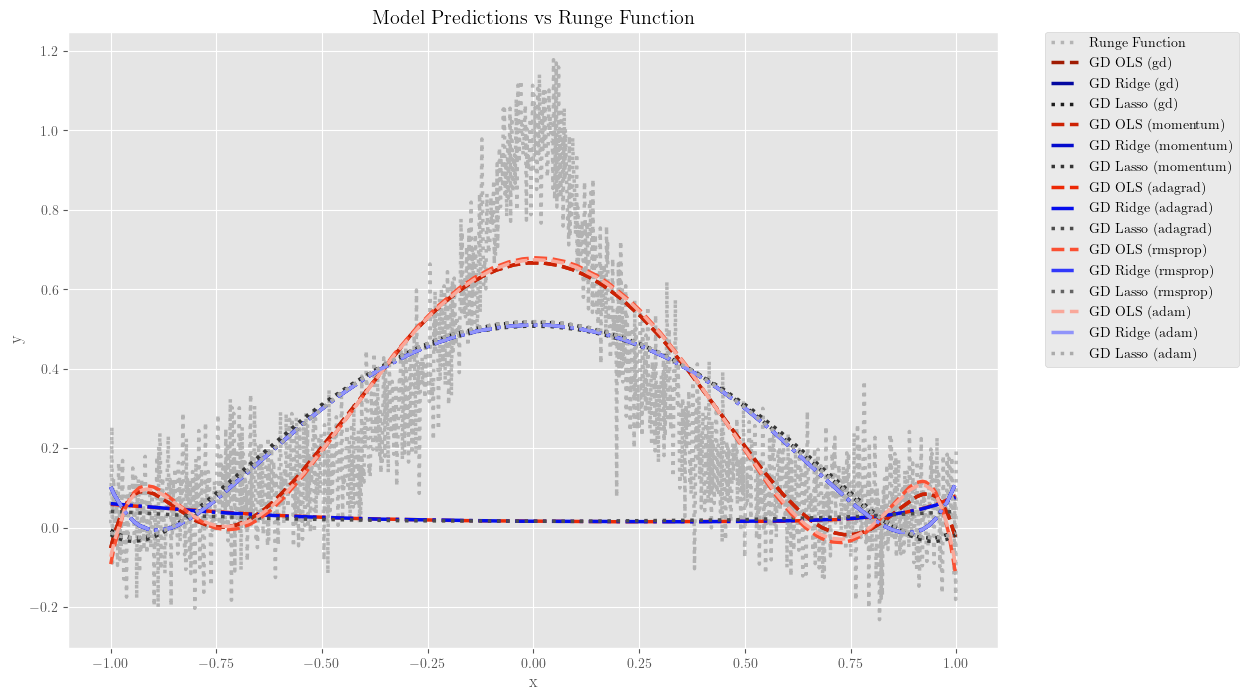

In [15]:
# Plot the results from OLS and Ridge on the test data
plt.figure(figsize=(12, 8))
# Plot the true function, however we need to sort x for this
sort_indices_full = np.argsort(x.flatten())
plt.plot(x[sort_indices_full], y[sort_indices_full], color='gray', linestyle=':', label='Runge Function', linewidth=2.5, alpha=0.5)
# Sort x_test and corresponding predictions for better plotting
sort_indices = np.argsort(x_test.flatten())
#plt.plot(x_test[sort_indices], y_pred_ols[sort_indices],   color='blue', label='OLS - Analytical',   zorder=5, linewidth=3, linestyle='-')
#plt.plot(x_test[sort_indices], y_pred_ridge[sort_indices], color='red',  label='Ridge - Analytical', zorder=8, linewidth=3, linestyle='-')
#plt.plot(x_test[sort_indices], y_pred_Lasso[sort_indices], color='Black',  label='Lasso Prediction', zorder=8, linewidth=2.5, linestyle='-')
colors_OLS   = {'gd': '#A01B03', 'momentum': '#CD2204', 'adagrad': '#ED2905', 'rmsprop': '#FB5032', 'adam': "#F9A89A"}
colors_Ridge = {'gd': '#0308A0', 'momentum': '#040BCD', 'adagrad': '#050DED', 'rmsprop': '#3239FB', 'adam': "#9094FA"}
colors_Lasso = {'gd': '#1D1D1D', 'momentum': '#353535', 'adagrad': '#4C4C4C', 'rmsprop': '#646464', 'adam': "#ABABAB"}
for method in methods:
    plt.plot(x_test[sort_indices], X_test[sort_indices] @ results[method]['theta_OLS'],   label=f'GD OLS ({method})',   linewidth=2.5, linestyle='--', color=colors_OLS[method])
    plt.plot(x_test[sort_indices], X_test[sort_indices] @ results[method]['theta_Ridge'], label=f'GD Ridge ({method})', linewidth=2.5, linestyle='-.', color=colors_Ridge[method])
    plt.plot(x_test[sort_indices], X_test[sort_indices] @ results[method]['theta_Lasso'], label=f'GD Lasso ({method})', linewidth=2.5, linestyle=':',  color=colors_Lasso[method])
plt.xlabel("x")
plt.ylabel("y")
plt.title("Model Predictions vs Runge Function")
# Making the legend outside the plot
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)
plt.show()

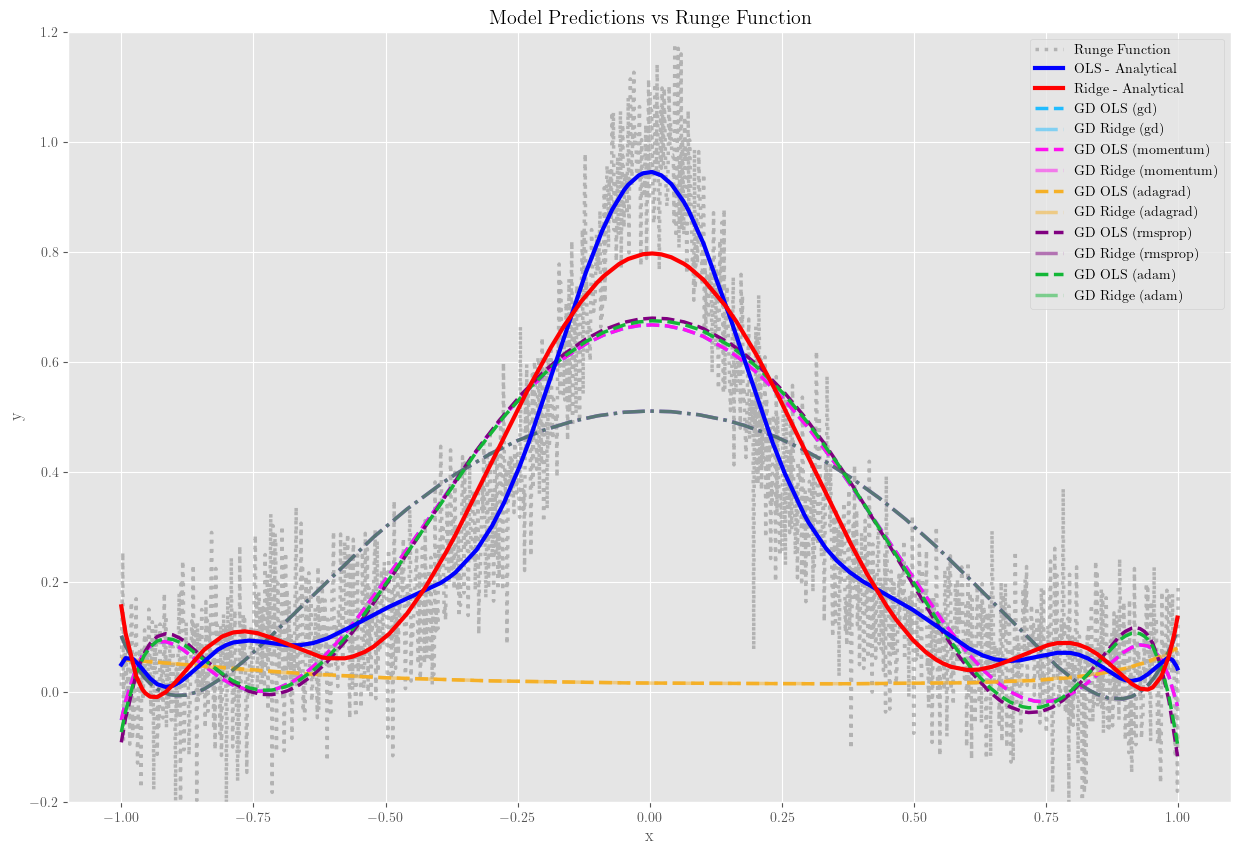

In [18]:
# Plot the results from OLS and Ridge on the test data
plt.figure(figsize=(15,10))
# Plot the true function, however we need to sort x for this
sort_indices_full = np.argsort(x.flatten())
plt.plot(x[sort_indices_full], y[sort_indices_full], color='gray', linestyle=':', label='Runge Function', linewidth=2.5, alpha=0.5)
# Sort x_test and corresponding predictions for better plotting
sort_indices = np.argsort(x_test.flatten())
plt.plot(x_test[sort_indices], y_pred_ols[sort_indices],   color='blue', label='OLS - Analytical',   zorder=5, linewidth=3, linestyle='-')
plt.plot(x_test[sort_indices], y_pred_ridge[sort_indices], color='red',  label='Ridge - Analytical', zorder=8, linewidth=3, linestyle='-')
#plt.plot(x_test[sort_indices], y_pred_Lasso[sort_indices], color='Black',  label='Lasso Prediction', zorder=8, linewidth=2.5, linestyle='-')
colors_OLS   = {'gd': '#A01B03', 'momentum': '#CD2204', 'adagrad': '#ED2905', 'rmsprop': '#FB5032', 'adam': '#FC775F'}
colors_Ridge = {'gd': '#0308A0', 'momentum': '#040BCD', 'adagrad': '#050DED', 'rmsprop': '#3239FB', 'adam': '#5F64FC'}
colors_cost_history    = {'gd': '#21BCFF', 'momentum': '#FF10F0', 'adagrad': '#F5B027', 'rmsprop': '#800080', 'adam': "#13B737"}
#colors_Lasso = {'gd': '#1D1D1D', 'momentum': '#353535', 'adagrad': '#4C4C4C', 'rmsprop': '#646464', 'adam': '#7C7C7C'}
for method in methods:
    plt.plot(x_test[sort_indices], X_test[sort_indices] @ results[method]['theta_OLS'],   label=f'GD OLS ({method})',   linewidth=2.5, linestyle='--', color=colors_cost_history[method])
    plt.plot(x_test[sort_indices], X_test[sort_indices] @ results[method]['theta_Ridge'], label=f'GD Ridge ({method})', linewidth=2.5, linestyle='-.', color=colors_cost_history[method], alpha=0.5)
    #plt.plot(x_test[sort_indices], X_test[sort_indices] @ results[method]['theta_Lasso'], label=f'GD Lasso ({method})', linewidth=2.5, linestyle=':',  color=colors_Lasso[method])
plt.xlabel("x")
plt.ylabel("y")
plt.ylim(-0.2,1.2)
plt.title("Model Predictions vs Runge Function")
# Making the legend outside the plot
plt.legend(loc='upper right')
plt.savefig(out_dir / "Model_predictions_GD_and_analytical.pdf" , dpi=200, bbox_inches="tight")
plt.show()